# MACHINE LEARNING CLASSIFICATION AND COMPARISONS

This notebook we have used 6 different ML classifiers and compared them to find the best one that can accurately classify our malicious dataset.

## Installing some libraries.

In [1]:
pip install smote_variants

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced_databases

     |████████████████████████████████| 4.3 MB 1.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=224f552b4e33e8e0a4b4ff0566a6b76c3b03ae1181413bd47c14ecd4d2a27b6f
  Stored in directory: /Users/rahulbanerjee/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn

     |████████████████████████████████| 189 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 6.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


## Importing libraries for our needs.

In [5]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

## Reading the dataset to a dataframe.

In [5]:
##from google.colab import drive
##drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_train = pd.read_csv('ml_dataset.csv')

In [7]:
df = df_train.copy()
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
df_attack = df[df['attack'] == 1]

In [9]:
df_normal = df[df['attack'] == 0]

## Getting genral idea about the weight of available classification packets.

In [10]:
df.head()

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,10,1729,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,...,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1
1,10,1604,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,...,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1
2,8,1708,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,...,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1
3,8,1462,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,...,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1
4,8,1296,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,...,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1


1    1926608
0        477
Name: attack, dtype: int64

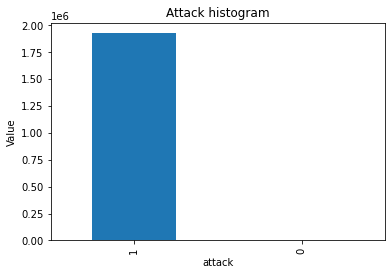

In [11]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

 #### Here we can find that there is a lot of imbalance in the dataset, so we can tell the data is highly-imballanced. Thus we need to synthtically oversample the minority class to get a balanced dataset for training and testing.

## Defining some methods which are later used:

In [15]:
# Used to plot the roc curve.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)

# Used for splitting and normalizing dataset.
def test_scale():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

### Here, we are applying SMOTE method, and applying it to dataset. We use the daataset by applying attack packets to X and normal to Y and oversample Y sythetically to length of X

In [17]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']
smote_obj = SMOTE()
X, y = smote_obj.fit_resample(X, y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression:


In [19]:
test_scale()

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[771384      0]
 [    91 769812]]


<ipython-input-15-67a29a969878>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-15-67a29a969878>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


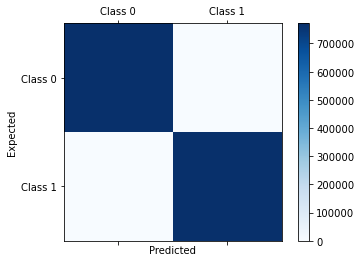

Accuracy 0.9999409584327903
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771384
           1       1.00      1.00      1.00    769903

    accuracy                           1.00   1541287
   macro avg       1.00      1.00      1.00   1541287
weighted avg       1.00      1.00      1.00   1541287

AUC Score: 
0.9999409016460515


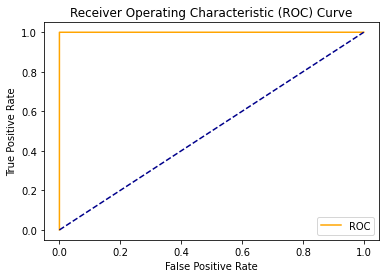

In [20]:
classif_results()

# Decision Trees

In [21]:
test_scale()

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



Confusion matrix:
 [[771574      0]
 [     1 769725]]


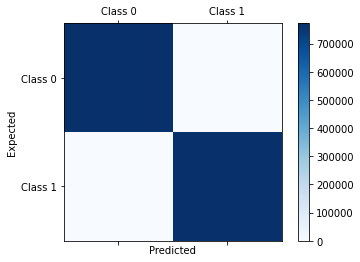

Accuracy 0.9999993511970414
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999993504182008


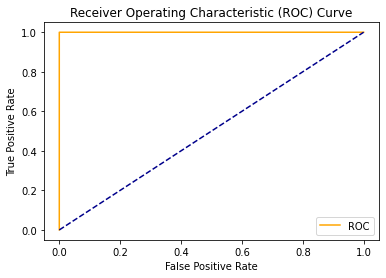

In [46]:
classif_results()

# Random Forest:

In [22]:
test_scale()

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

<ipython-input-22-c5bc9d90f189>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Confusion matrix:
 [[771574      0]
 [     0 769726]]


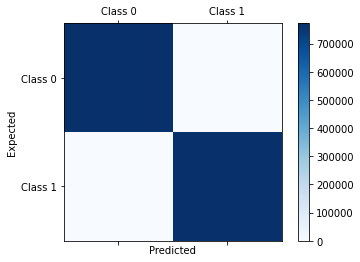

Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
1.0


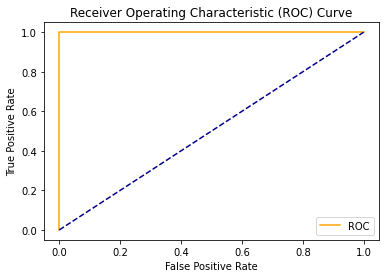

In [54]:
classif_results()

# KNN

In [ ]:
test_scale()


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix:
 [[771574      0]
 [     6 769720]]


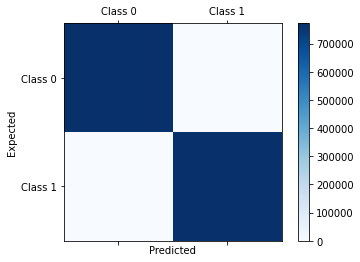

Accuracy 0.9999961071822487
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999961025092046


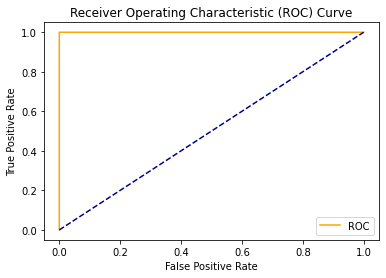

In [56]:
classif_results()

# Support Vector Machines:

In [ ]:
test_scale()

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[771574      0]
 [    13 769713]]


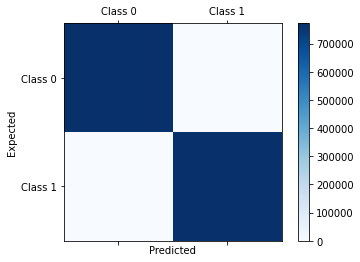

Accuracy 0.999991565561539
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999915554366099


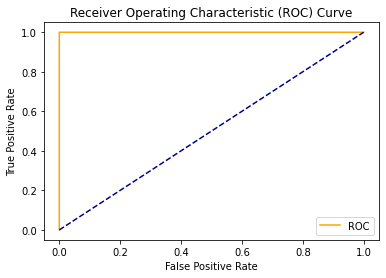

In [23]:
classif_results()

# Naive Bayes Classifier

In [ ]:
test_scale()

# Fitting SVM to the Training set
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
classifier = GaussianNB()

# Train the model using the training sets
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[771574      0]
 [   837 768889]]


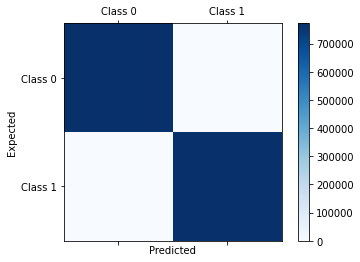

Accuracy 0.9994569519237008
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9994563000340381


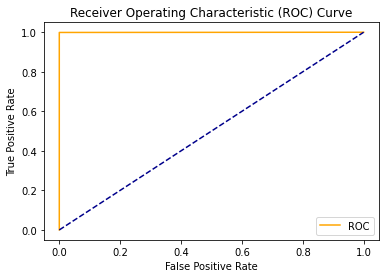

In [29]:
classif_results()

# Neural Network

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Epoch 1/3
2311948/2311948 [==============================] - 263s 114us/step - loss: 0.0029 - accuracy: 0.9998
Epoch 2/3
2311948/2311948 [==============================] - 260s 113us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 3/3
2311948/2311948 [==============================] - 260s 112us/step - loss: 0.0031 - accuracy: 1.0000


Confusion matrix:
 [[771574      0]
 [    12 769714]]


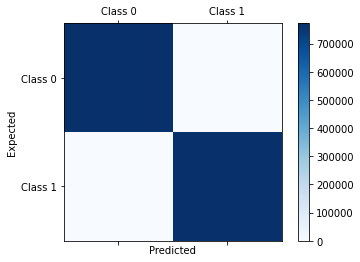

Accuracy 0.9999922143644975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999922050184091


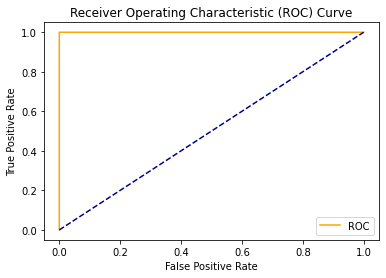

In [36]:
classif_results()